In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [54]:
#import data 
import csv
df = pd.read_csv(r'C:\Users\rackley\Desktop\grad school\555\EE555-FinalProject-main\load_per_country.csv', parse_dates=['DateTime'], index_col = ['DateTime'])
gdp = pd.read_csv(r'C:\Users\rackley\Desktop\grad school\555\EE555-FinalProject-main\gdp_per_country.csv', parse_dates=['DateTime'], index_col = ['DateTime'])
pop = pd.read_csv(r'C:\Users\rackley\Desktop\grad school\555\EE555-FinalProject-main\population_per_country.csv', parse_dates=['DateTime'], index_col = ['DateTime'])
tmp =  pd.read_csv(r'C:\Users\rackley\Desktop\grad school\555\EE555-FinalProject-main\tmp_per_country.csv', parse_dates=['DateTime'], index_col = ['DateTime'])



In [55]:
#join all information
joined = df.join(gdp, on='DateTime', how='left', lsuffix = '', rsuffix = '_GDP', sort=False)
joined = joined.join(pop, on='DateTime', how='left', lsuffix = '', rsuffix = '_POP', sort=False)
joined = joined.join(tmp, on='DateTime', how='left', lsuffix = '', rsuffix = '_TMP', sort=False)
joined = joined.replace(',','', regex=True)
joined_interpolate = joined.interpolate(method='ffill') # or method='index' works too



In [56]:
#data for Poland [PL] and Germany [DE]
country_datasets = []
country_list = ['PL', 'DE']

for country in country_list: 
    country_dataset = joined_interpolate[[country, country + '_GDP', country+ '_POP', country+'_TMP']]
    country_datasets.append([country, country_dataset])

for each in country_datasets: 
    name = each[0]
    dataset = each[1]
    

In [57]:
nonan = dataset.dropna()
#nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='24H')).sum()

nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='M')).sum()

# normalize
nonan = nonan / nonan.max(axis=0) # works


x_train, x_test, y_train, y_test = train_test_split(nonan.iloc[:, :1].values, nonan['DE'].values,test_size=0.2)


Coefficients: 
 [1.]
Mean squared error: 0.00
Coefficient of determination: 1.00


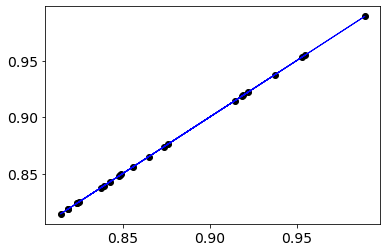

In [79]:
# logistic regression
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


#Create linear regression
reg = linear_model.LinearRegression()

#Train the model using the training sets 
reg.fit(x_train,y_train)

#Making a predictions using test set 
GDP_y_pred = reg.predict(x_test)

#The coefficients 
print("Coefficients: \n", reg.coef_)
#The mean squared error 
print("Mean squared error: %.2f"% mean_squared_error(y_test, GDP_y_pred))
#the coefficient of determination : 1 is perfect prediction 
print("Coefficient of determination: %.2f" % r2_score(y_test, GDP_y_pred))

#plot outputs 
plt.scatter(x_test, y_test, color ="black")
plt.plot(x_test, GDP_y_pred, color ="blue", linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.ylabel('')
plt.xlabel('')

plt.show()

